In [240]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [187]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The shape of dataset is 908 X 25. Fuel type and capacity are target variables.

In [188]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Dealing with null data is important. Almost all data is missing in wepp_id, estimated_generation_gwh, other_fuel2, other_fuel3. Removing them alltogether. Country_Long is the same as country - dropping. Latitude and longitude can be imputed with reference to the country they are in. Other fuel to be removed as it is mostly missing data.

In [189]:
df['name'].unique().shape
#Names are all different. They will not add anything to the maodel. Removing it.

(908,)

In [190]:
df['gppd_idnr'].unique().shape
#While gppd_idnr is different for all, the primary code may have some insight. Will split the numerical value and string code 
#and examine futrther

(908,)

In [191]:
df['gppd_idnr1']= df['gppd_idnr']
df['gppd_idnr1'] = df['gppd_idnr1'].str[3:]
df['gppd_idnr'] = df['gppd_idnr'].str[:3]
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,gppd_idnr1
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1020239
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1019881
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026669
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,NaN,NaN,...,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,0000001
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,0000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,0000513
904,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026222
905,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026776
906,IND,India,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1019901


In [192]:
df['gppd_idnr'].unique().shape

(2,)

In [193]:
df['gppd_idnr1'].unique().shape
#There is no data value in the number part of id. Will be removed   

(908,)

In [194]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [195]:
df['gppd_idnr'].value_counts()
#Data is categorical. Will have to encode.

IND    520
WRI    388
Name: gppd_idnr, dtype: int64

In [196]:
newdf = df.query('other_fuel1 == "Oil" & gppd_idnr == "IND"')
newdf.shape

(196, 26)

In [197]:
newdf = df.query('other_fuel1 == "Gas" & gppd_idnr == "IND"')
newdf.shape

(2, 26)

In [198]:
newdf = df.query('other_fuel1 == "Cogeneration" & gppd_idnr == "IND"')
newdf.shape

(1, 26)

All Other fuel1s are from IND. We'll check for the correlation between other factors to see if we can get rid of the column. 

In [199]:
df['primary_fuel'].value_counts() 

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [200]:
df = df.drop(['wepp_id', 'estimated_generation_gwh', 'other_fuel2', 'other_fuel3', 'country_long', 'gppd_idnr1'], axis = 1)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   name                    908 non-null    object 
 2   gppd_idnr               908 non-null    object 
 3   capacity_mw             908 non-null    float64
 4   latitude                862 non-null    float64
 5   longitude               862 non-null    float64
 6   primary_fuel            908 non-null    object 
 7   other_fuel1             199 non-null    object 
 8   commissioning_year      528 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      889 non-null    object 
 13  year_of_capacity_data   520 non-null    float64
 14  generation_gwh_2013     384 non-null    fl

There are 10 Object type columns which need to be encoded

In [202]:
df['country'].value_counts()
# All data is from India. Removing the country column

IND    908
Name: country, dtype: int64

In [203]:
df = df.drop(['country'], axis = 1)

In [204]:
df['year_of_capacity_data'].value_counts()
# All data is in 2018. Will remove.

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [205]:
df = df.drop(['year_of_capacity_data'], axis = 1)

In [206]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [207]:
df['generation_data_source'].value_counts()
#generation_data_source has no data value. We'll have to remove it. 

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [208]:
df = df.drop(['generation_data_source'], axis = 1)

<AxesSubplot:>

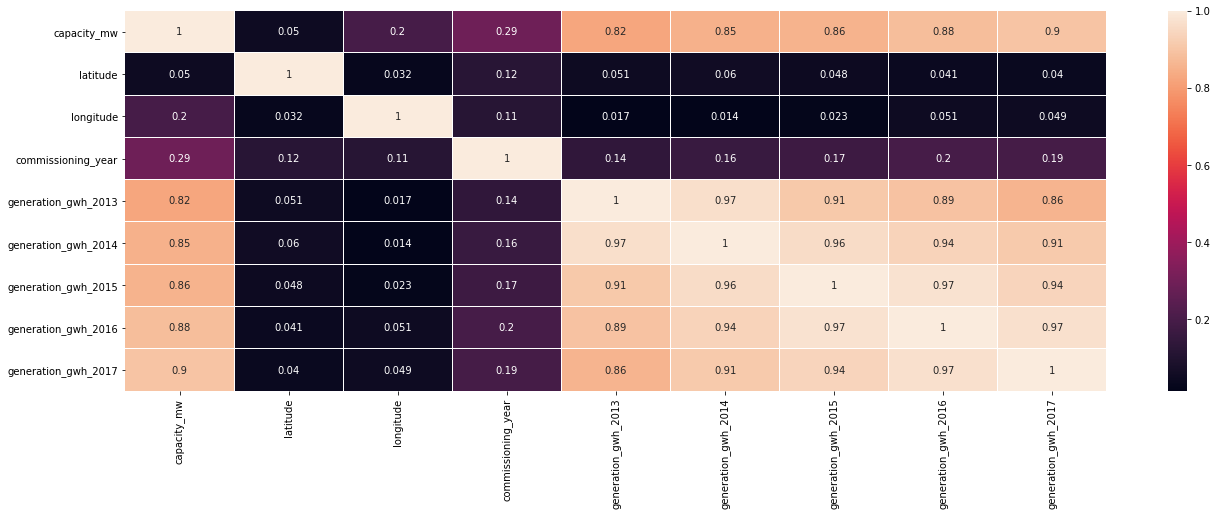

In [209]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   capacity_mw          908 non-null    float64
 3   latitude             862 non-null    float64
 4   longitude            862 non-null    float64
 5   primary_fuel         908 non-null    object 
 6   other_fuel1          199 non-null    object 
 7   commissioning_year   528 non-null    float64
 8   owner                342 non-null    object 
 9   source               908 non-null    object 
 10  url                  908 non-null    object 
 11  geolocation_source   889 non-null    object 
 12  generation_gwh_2013  384 non-null    float64
 13  generation_gwh_2014  401 non-null    float64
 14  generation_gwh_2015  425 non-null    float64
 15  generation_gwh_2016  437 non-null    flo

Encoding all values to have a wider understanding of the correlation with the dependant variable

In [211]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
for i in df:
    if df[i].dtypes != 'float64':
        s1 = lenc.fit_transform(df[i])
        s1 = pd.DataFrame(s1)
        df[i] = s1
    else:
        continue
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,1,2.5,28.1839,73.2407,6,3,2011.0,229,109,128,1,NaN,NaN,NaN,NaN,NaN
1,1,1,98.0,24.7663,74.6090,1,3,NaN,258,174,173,2,NaN,NaN,NaN,NaN,NaN
2,2,1,39.2,21.9038,69.3732,7,3,NaN,2,21,205,2,NaN,NaN,NaN,NaN,NaN
3,3,0,135.0,23.8712,91.3602,2,3,2004.0,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,0,1800.0,21.9603,82.4091,1,2,2015.0,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,0,1600.0,16.2949,77.3568,1,2,2016.0,280,22,58,2,NaN,NaN,0.994875,233.596650,865.400000
904,904,1,3.0,12.8932,78.1654,6,3,NaN,114,77,22,0,NaN,NaN,NaN,NaN,NaN
905,905,1,25.5,15.2758,75.5811,7,3,NaN,280,21,260,2,NaN,NaN,NaN,NaN,NaN
906,906,1,80.0,24.3500,73.7477,1,3,NaN,91,59,82,2,NaN,NaN,NaN,NaN,NaN


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    int32  
 1   gppd_idnr            908 non-null    int32  
 2   capacity_mw          908 non-null    float64
 3   latitude             862 non-null    float64
 4   longitude            862 non-null    float64
 5   primary_fuel         908 non-null    int32  
 6   other_fuel1          908 non-null    int32  
 7   commissioning_year   528 non-null    float64
 8   owner                908 non-null    int32  
 9   source               908 non-null    int32  
 10  url                  908 non-null    int32  
 11  geolocation_source   908 non-null    int32  
 12  generation_gwh_2013  384 non-null    float64
 13  generation_gwh_2014  401 non-null    float64
 14  generation_gwh_2015  425 non-null    float64
 15  generation_gwh_2016  437 non-null    flo

In [213]:
# All names are different.
df = df.drop(['name'], axis = 1)

<AxesSubplot:>

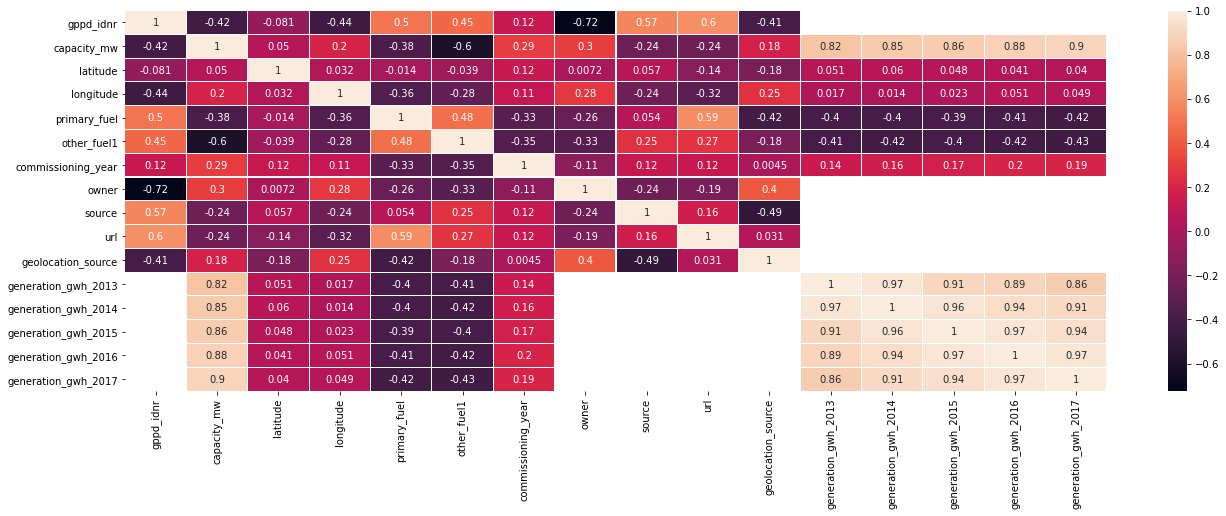

In [214]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)

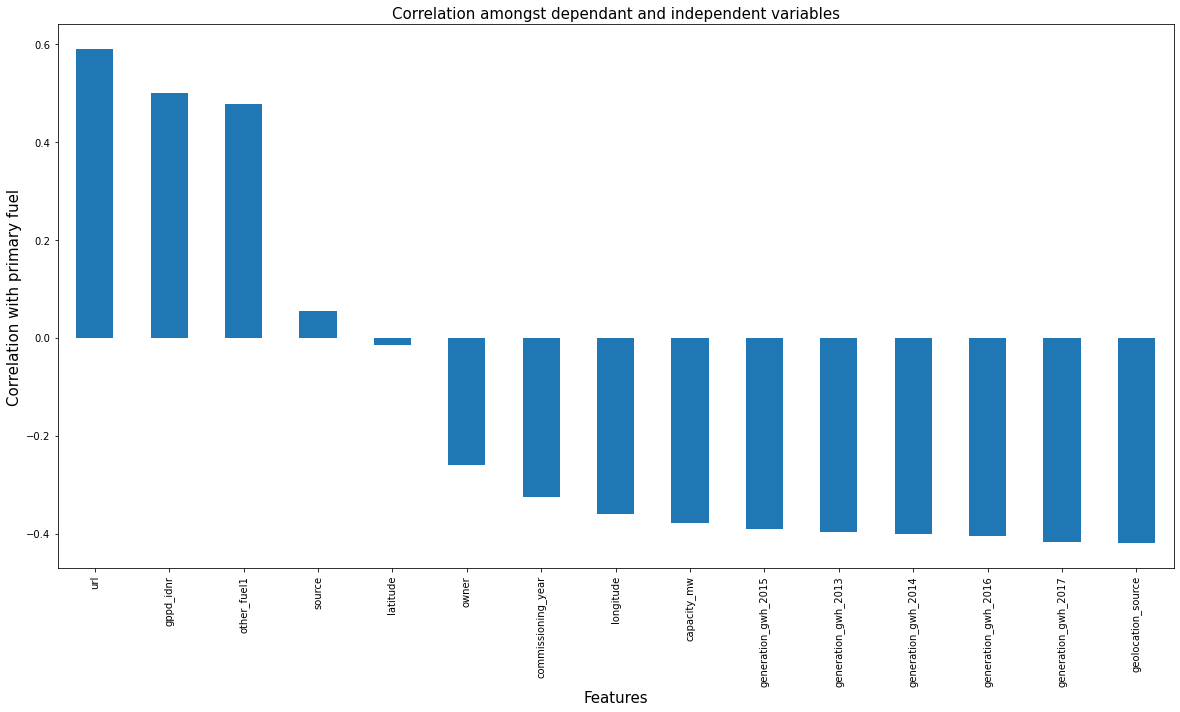

In [215]:
df2 = df.corr()
plt.figure(figsize=(20,10))
df2['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Correlation with primary fuel', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()

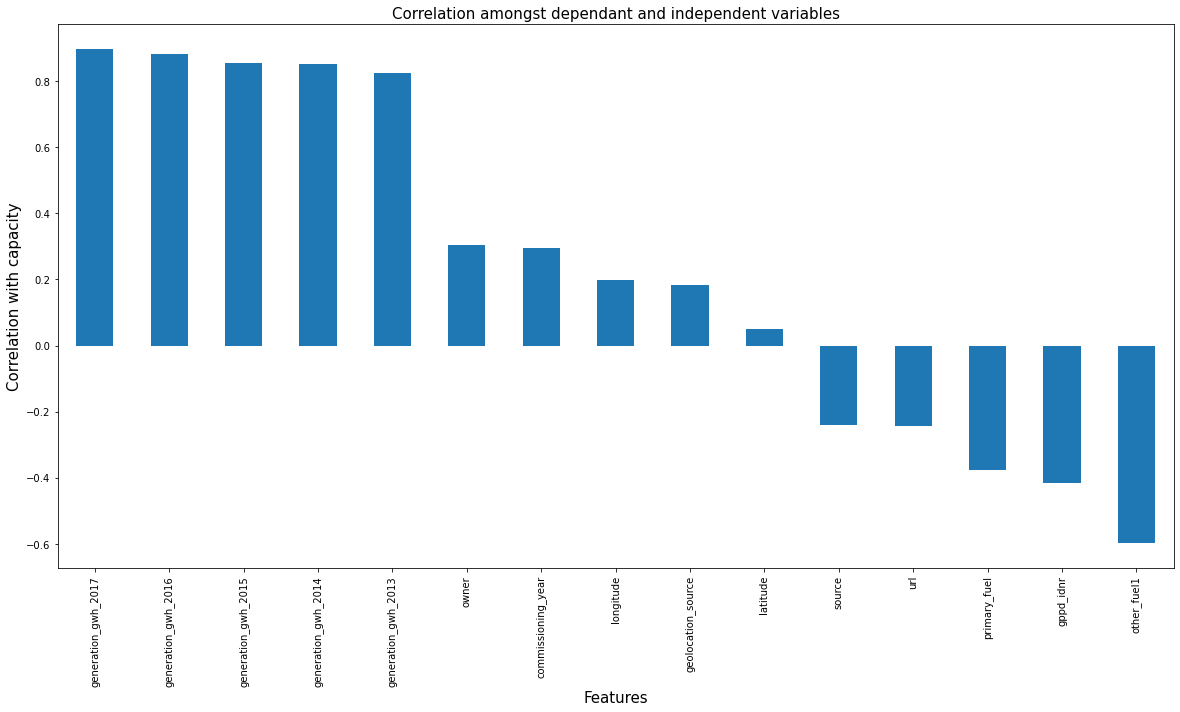

In [216]:
df3 = df.corr()
plt.figure(figsize=(20,10))
df3['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Correlation with capacity', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()

The gwh generation from 2013 to 2017 depend on heach other and also, heavily on the capacity. So, we can use KNImputer to input null data from capacity and subsequent years of gwh generation. Latitude and longitude are correlated with gppd_idhr. Using imputation to get that data too. Commissioning year can be filled in using the mode.

In [219]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
itim = IterativeImputer()
df['generation_gwh_2017'] = itim.fit_transform(df[['capacity_mw', 'generation_gwh_2017']])[:,1]
df['generation_gwh_2016'] = itim.fit_transform(df[['generation_gwh_2017', 'generation_gwh_2016']])[:,1]
df['generation_gwh_2015'] = itim.fit_transform(df[['generation_gwh_2016', 'generation_gwh_2015']])[:,1]
df['generation_gwh_2014'] = itim.fit_transform(df[['generation_gwh_2015', 'generation_gwh_2014']])[:,1]
df['generation_gwh_2013'] = itim.fit_transform(df[['generation_gwh_2014', 'generation_gwh_2013']])[:,1]

In [220]:
df['commissioning_year'] = df['commissioning_year'].fillna(2013)
#2013 is mode of the values

In [221]:
df['latitude'] = itim.fit_transform(df[['gppd_idnr', 'latitude']])[:,1]
df['longitude'] = itim.fit_transform(df[['gppd_idnr', 'longitude']])[:,1]


In [222]:
df.isna().sum()

gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [223]:
df.skew()

gppd_idnr              0.294357
capacity_mw            3.193257
latitude              -0.147660
longitude              1.109810
primary_fuel           0.471141
other_fuel1           -1.619441
commissioning_year    -1.779021
owner                 -1.375607
source                 1.829145
url                    1.512258
geolocation_source    -1.922080
generation_gwh_2013    4.876019
generation_gwh_2014    4.684379
generation_gwh_2015    4.835324
generation_gwh_2016    4.613861
generation_gwh_2017    4.583569
dtype: float64

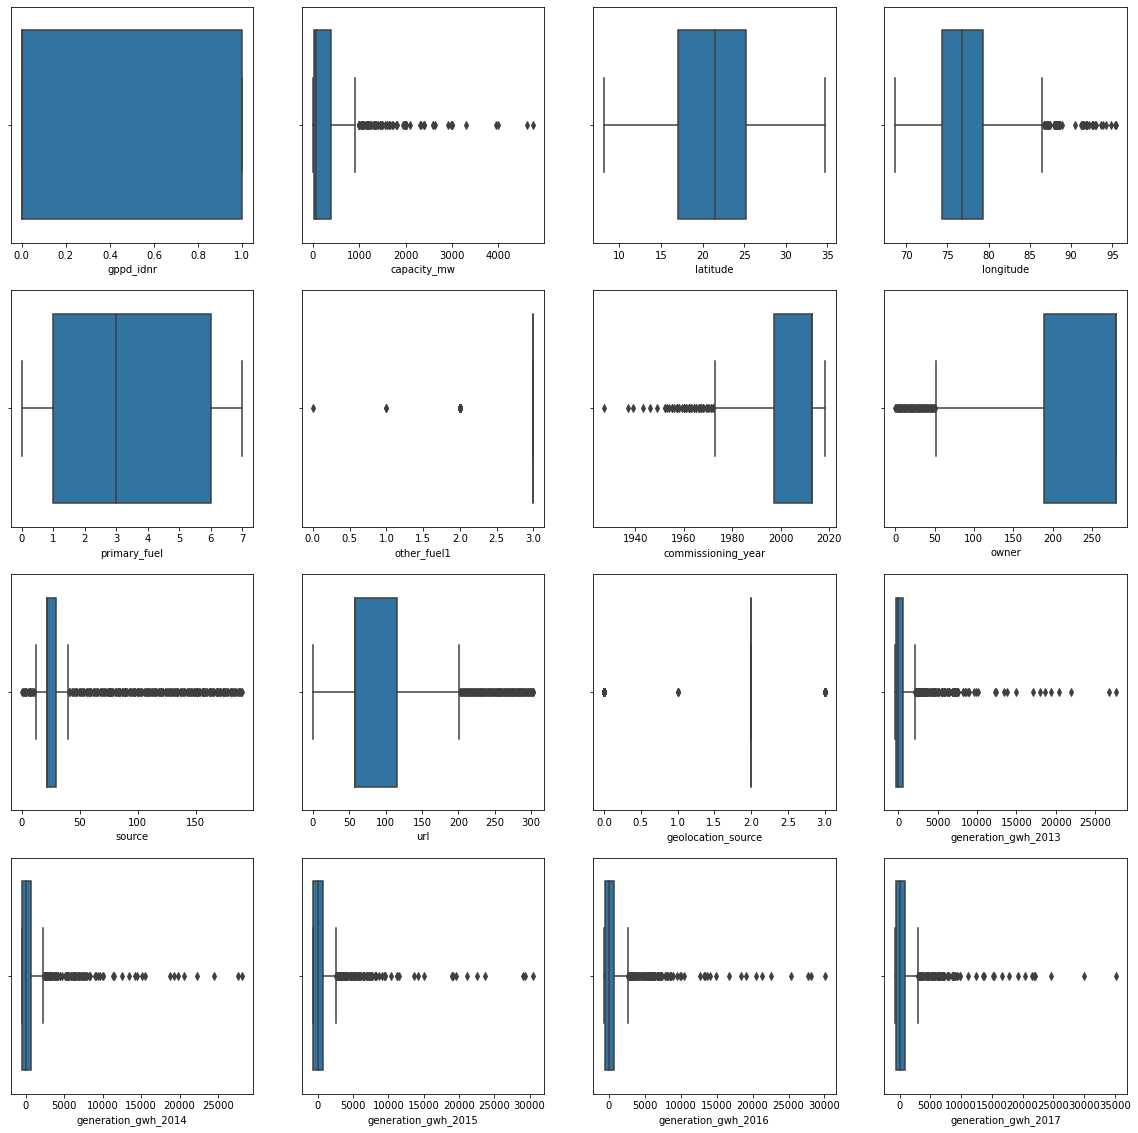

In [226]:
plt.figure(figsize=(20,20))
gr = 1
for c in df:
    ax = plt.subplot(4, 4, gr)
    sns.boxplot(df[c])
    plt.xlabel(c, fontsize = 10)
    gr+=1
plt.show()

There are outliers in generation gwh factors. However, let's check the shape of the curves

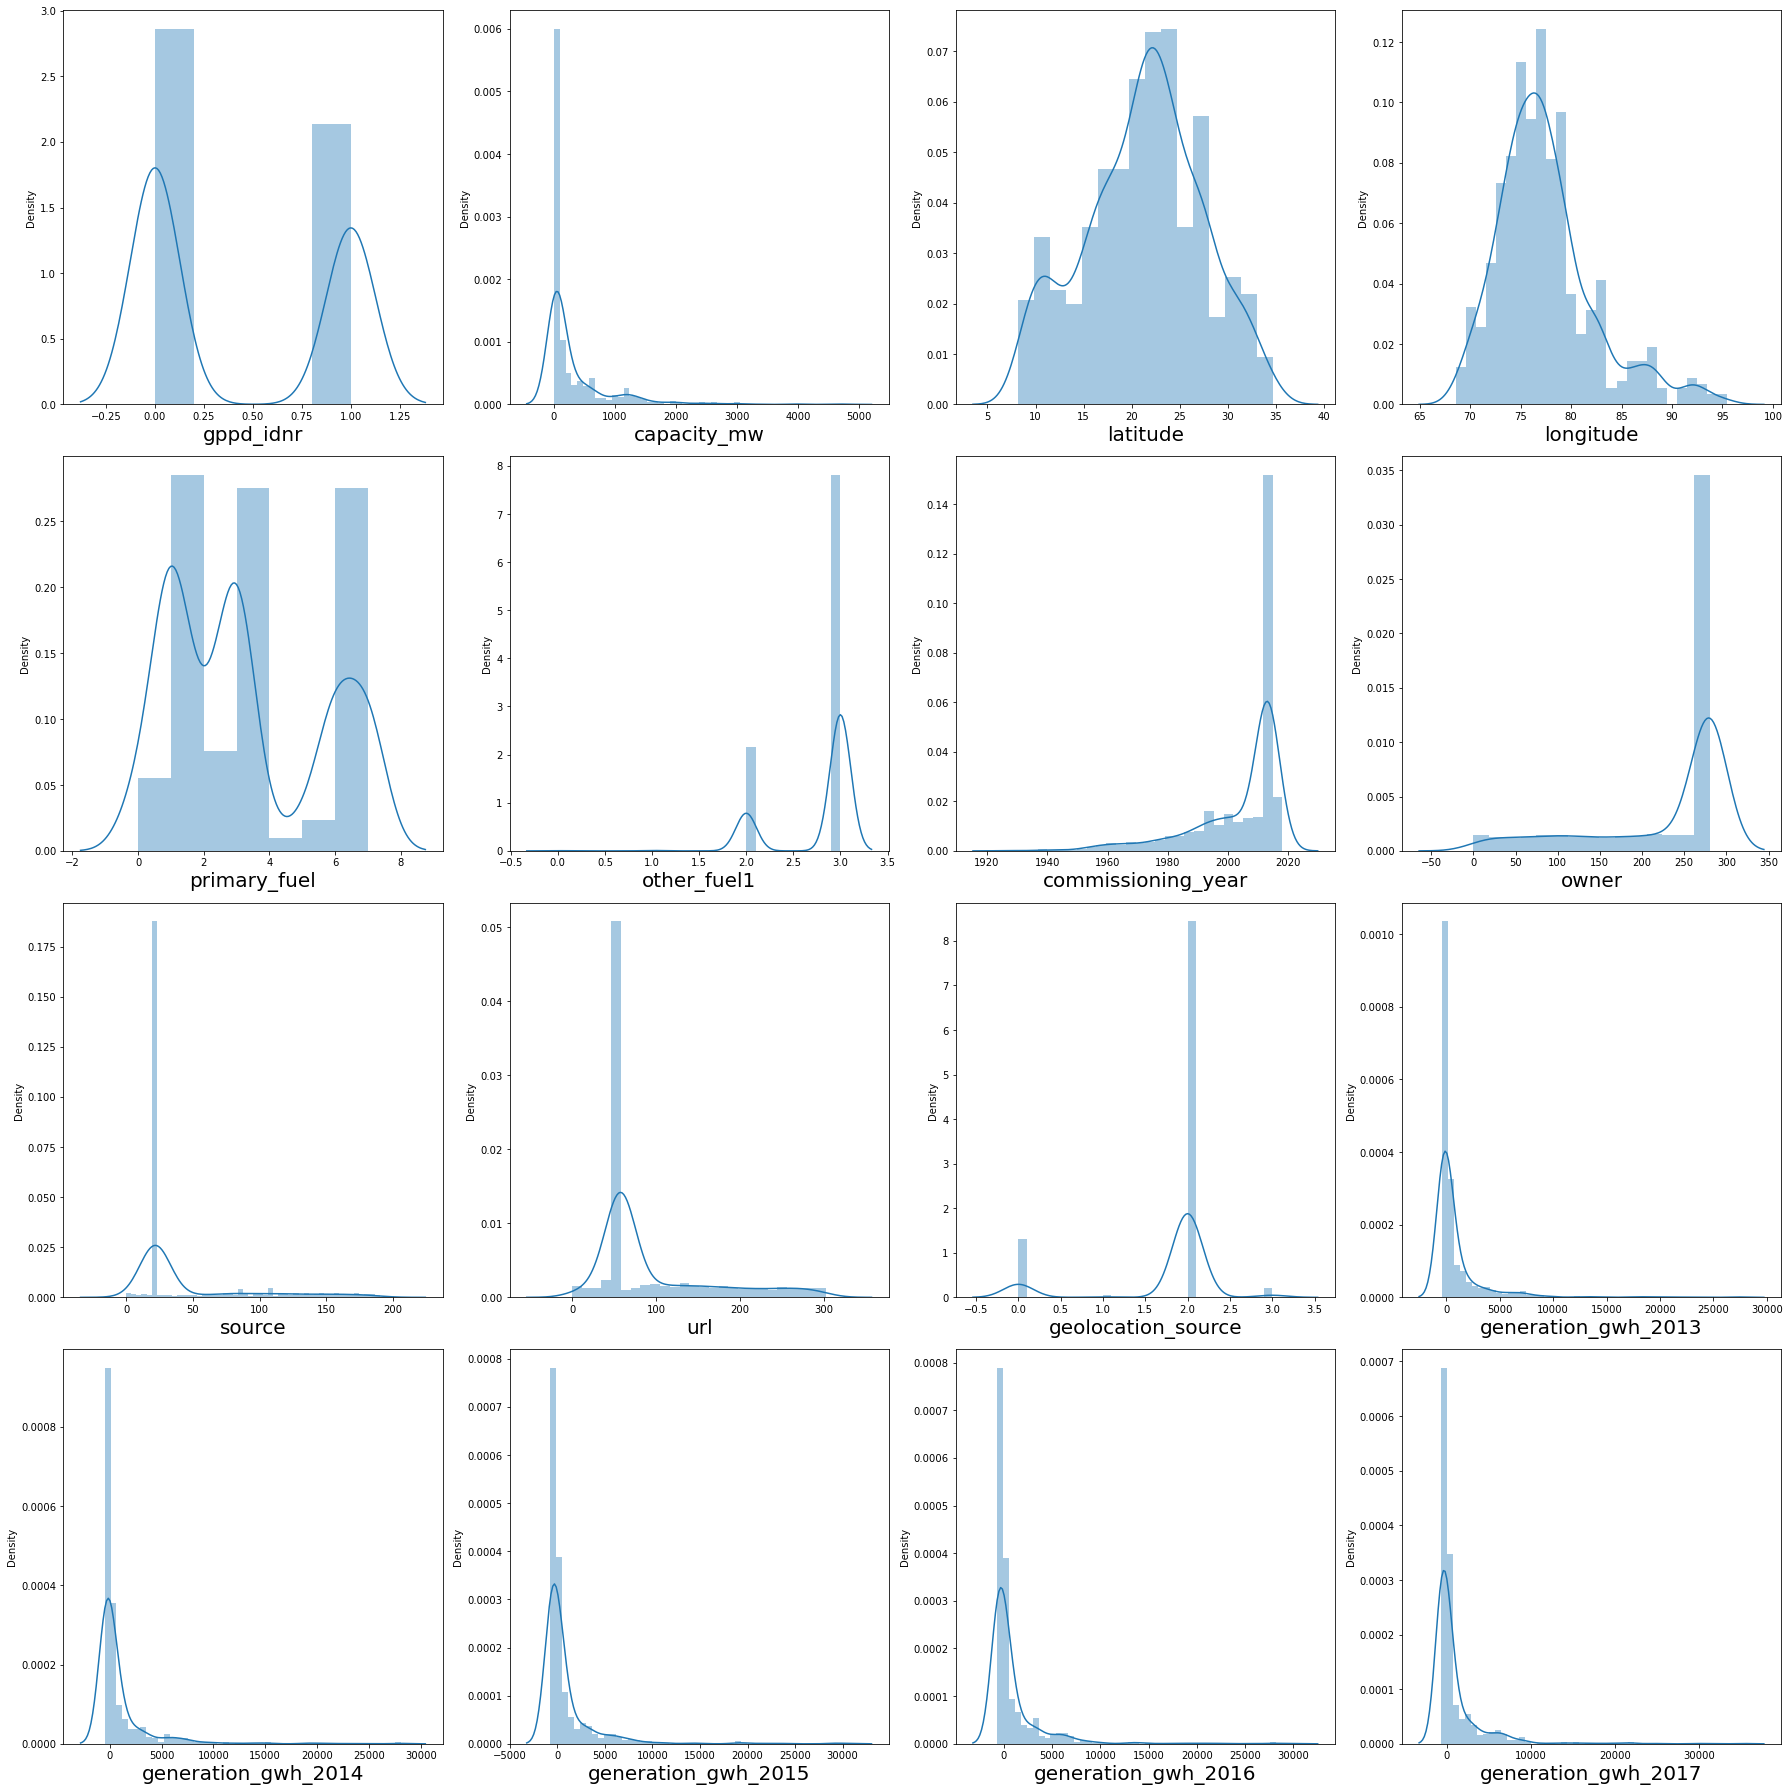

In [227]:
plt.figure(figsize=(25,25))
plotnumber = 1
for c in df:
    ax= plt.subplot(4,4,plotnumber)
    sns.distplot(df[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()

The skewness in continuous factor data points should be removed -  generation gwh 2013, 2014, 2015, 2016, 2017

In [234]:
from scipy.stats import zscore
z=np.abs(zscore(df.drop(['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016'
                        , 'generation_gwh_2017'], axis=1)))
dfn=df[(z<3).all(axis=1)]
dfn.shape

(839, 16)

Less than 10% data is lost. No problem.

In [235]:
dfn.skew()

gppd_idnr              0.228334
capacity_mw            1.967893
latitude              -0.119576
longitude              0.884572
primary_fuel           0.424715
other_fuel1           -1.419396
commissioning_year    -1.572520
owner                 -1.260710
source                 1.794155
url                    1.441613
geolocation_source    -1.865914
generation_gwh_2013    3.101830
generation_gwh_2014    2.830104
generation_gwh_2015    2.613303
generation_gwh_2016    2.487265
generation_gwh_2017    2.299773
dtype: float64

Data still has skew. We'll separate the dependant and independant variables and deal with the skewness of continuous variables.

In [236]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
dfn1 = power.fit_transform(dfn.drop(['gppd_idnr', 'latitude', 'longitude', 'other_fuel1', 'commissioning_year', 
                                    'owner', 'source', 'url', 'capacity_mw', 'geolocation_source', 'primary_fuel'], axis=1))
dfn1 = pd.DataFrame(dfn1)
dfn1.columns = dfn.drop(['gppd_idnr', 'latitude', 'longitude', 'other_fuel1','capacity_mw', 'commissioning_year', 
                                    'owner', 'source', 'url', 'geolocation_source', 'primary_fuel'], axis=1).columns
dfn.index = dfn1.index
for i in dfn1:
    dfn[i] = dfn1[i]
dfn.skew()

gppd_idnr              0.228334
capacity_mw            1.967893
latitude              -0.119576
longitude              0.884572
primary_fuel           0.424715
other_fuel1           -1.419396
commissioning_year    -1.572520
owner                 -1.260710
source                 1.794155
url                    1.441613
geolocation_source    -1.865914
generation_gwh_2013    0.594985
generation_gwh_2014    0.582343
generation_gwh_2015    0.590434
generation_gwh_2016    0.573338
generation_gwh_2017    0.543700
dtype: float64

The skew is reduced to almost 0.5. Ready to go. 

In [237]:
X = dfn.drop(['capacity_mw', 'primary_fuel'], axis = 1)
y = dfn[['capacity_mw', 'primary_fuel']]

In [238]:
vif1 = pd.DataFrame()
Xsc = np.asarray(X)
vif1['score'] = [variance_inflation_factor(Xsc,i) for i in range (Xsc.shape[1])]
vif1['Feature'] = X.columns
vif1

,score,Feature
0,15.847413,gppd_idnr
1,14.027159,latitude
2,437.917798,longitude
3,81.322783,other_fuel1
4,645.145369,commissioning_year
5,27.191542,owner
6,4.357195,source
7,7.403364,url
8,12.053471,geolocation_source
9,64.906146,generation_gwh_2013


URL, latitude, gppd_idnr and source have very little impact on the target. They will be removed. in case of overfitting

In [241]:
knn = KNeighborsRegressor()
lreg = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
dtc = DecisionTreeClassifier()
lor = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [254]:
knn.fit(X_train, y_train['capacity_mw'])
lreg.fit(X_train, y_train['capacity_mw'])
rf.fit(X_train, y_train['capacity_mw'])
dt.fit(X_train, y_train['capacity_mw'])
dtc.fit(X_train, y_train['primary_fuel'])
lor.fit(X_train, y_train['primary_fuel'])
rfc.fit(X_train, y_train['primary_fuel'])
knc.fit(X_train, y_train['primary_fuel'])
print(knn.score(X_test, y_test['capacity_mw']), lreg.score(X_test, y_test['capacity_mw']), rf.score(X_test, y_test['capacity_mw']), 
                                                                        dt.score(X_test, y_test['capacity_mw']))
print(knc.score(X_test, y_test['primary_fuel']), lor.score(X_test, y_test['primary_fuel']), rfc.score(X_test, y_test['primary_fuel']), 
                                                                               dtc.score(X_test, y_test['primary_fuel']))


0.6502007668008967 0.7163989678128092 0.8393456615458262 0.6698915585653673
0.6857142857142857 0.5190476190476191 0.9523809523809523 0.8857142857142857


random forest is the best option for the given data - Both, classification and regression options. Checking for cross validation

In [260]:
from sklearn.model_selection import GridSearchCV
params = {'bootstrap': [True, False],
          'n_estimators': [150, 200, 250, 300],
          'max_depth': [9, 11, 13, 15],
         'min_samples_split': [5, 10, 25],
         'min_samples_leaf': [5, 10, 25]}
grd = GridSearchCV(rf, param_grid = params)
grd1 = GridSearchCV(rfc, param_grid = params)
grd.fit(X_train, y_train['capacity_mw'])
grd1.fit(X_train, y_train['primary_fuel'])
print(grd.best_params_)
print(grd1.best_params_)

{'bootstrap': True, 'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 250}
{'bootstrap': False, 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 25, 'n_estimators': 200}


In [261]:
rf = grd.best_estimator_
rfc = grd1.best_estimator_
rfc.fit(X_train, y_train['primary_fuel'])
rf.fit(X_train, y_train['capacity_mw'])
print(rfc.score(X_test,y_test['primary_fuel']))
print(rf.score(X_test,y_test['capacity_mw']))

0.919047619047619
0.846058952640649


The data is not overfitting. Moving to save the file.

In [262]:
filename = 'Global1.pickle'
pickle.dump(rf, open(filename, 'wb'))

In [263]:
filename = 'Global2.pickle'
pickle.dump(rfc, open(filename, 'wb'))